In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Processing the data

In [322]:
df=pd.read_csv('/content/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [324]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# Checking for missing values

In [325]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


no missing values

# Checking for duplicates

In [326]:
df.duplicated().sum()

np.int64(0)

No duplicates

# Dropping unnecessary columns

In [327]:
#loan_id is a unique column so we must drop it or our model performance will drop a lot
df.drop('loan_id',axis='columns',inplace=True)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Handling Categorical Columns

In [328]:
#for self employed, replace Yes by 1 and No by 0
df[' self_employed']=df[' self_employed'].apply(lambda x:1 if x==' Yes' else 0)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [329]:
df[' education'].value_counts()

,count
education,
Graduate,2144
Not Graduate,2125


In [330]:
#for education, replace Graduate by 1 and Not Graduate by 0
df[' education']=df[' education'].apply(lambda x:1 if x==' Graduate' else 0)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [331]:
df[' loan_status'].value_counts()

,count
loan_status,
Approved,2656
Rejected,1613


In [332]:
#for loan_status, replace Approved by 1 and Rejectede by 0
df[' loan_status']=df[' loan_status'].apply(lambda x:0 if x==' Rejected' else 1)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


# Checking target column

In [333]:
df[' loan_status'].value_counts()

,count
loan_status,
1,2656
0,1613


Target is 0 or 1 so binary classification

# Visualizations

Checking Target column distribution

Text(0.5, 1.0, 'loan_status Distribution')

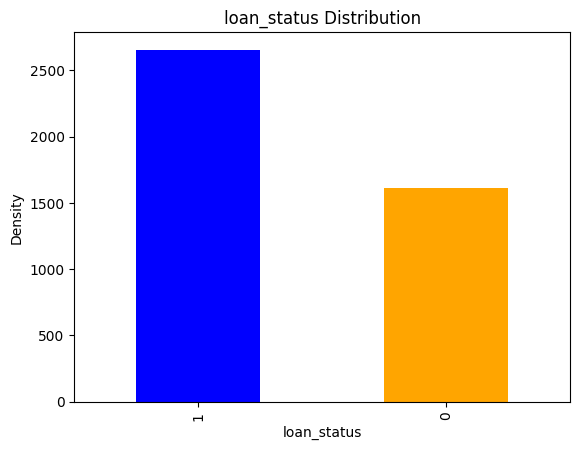

In [334]:
df[' loan_status'].value_counts().plot(kind='bar',color=['blue','orange'])
plt.xlabel("loan_status")
plt.ylabel("Density")
plt.title("loan_status Distribution")

Not a major imbalance

Checking features with target

Text(0.5, 1.0, 'bank_asset_value Distribution')

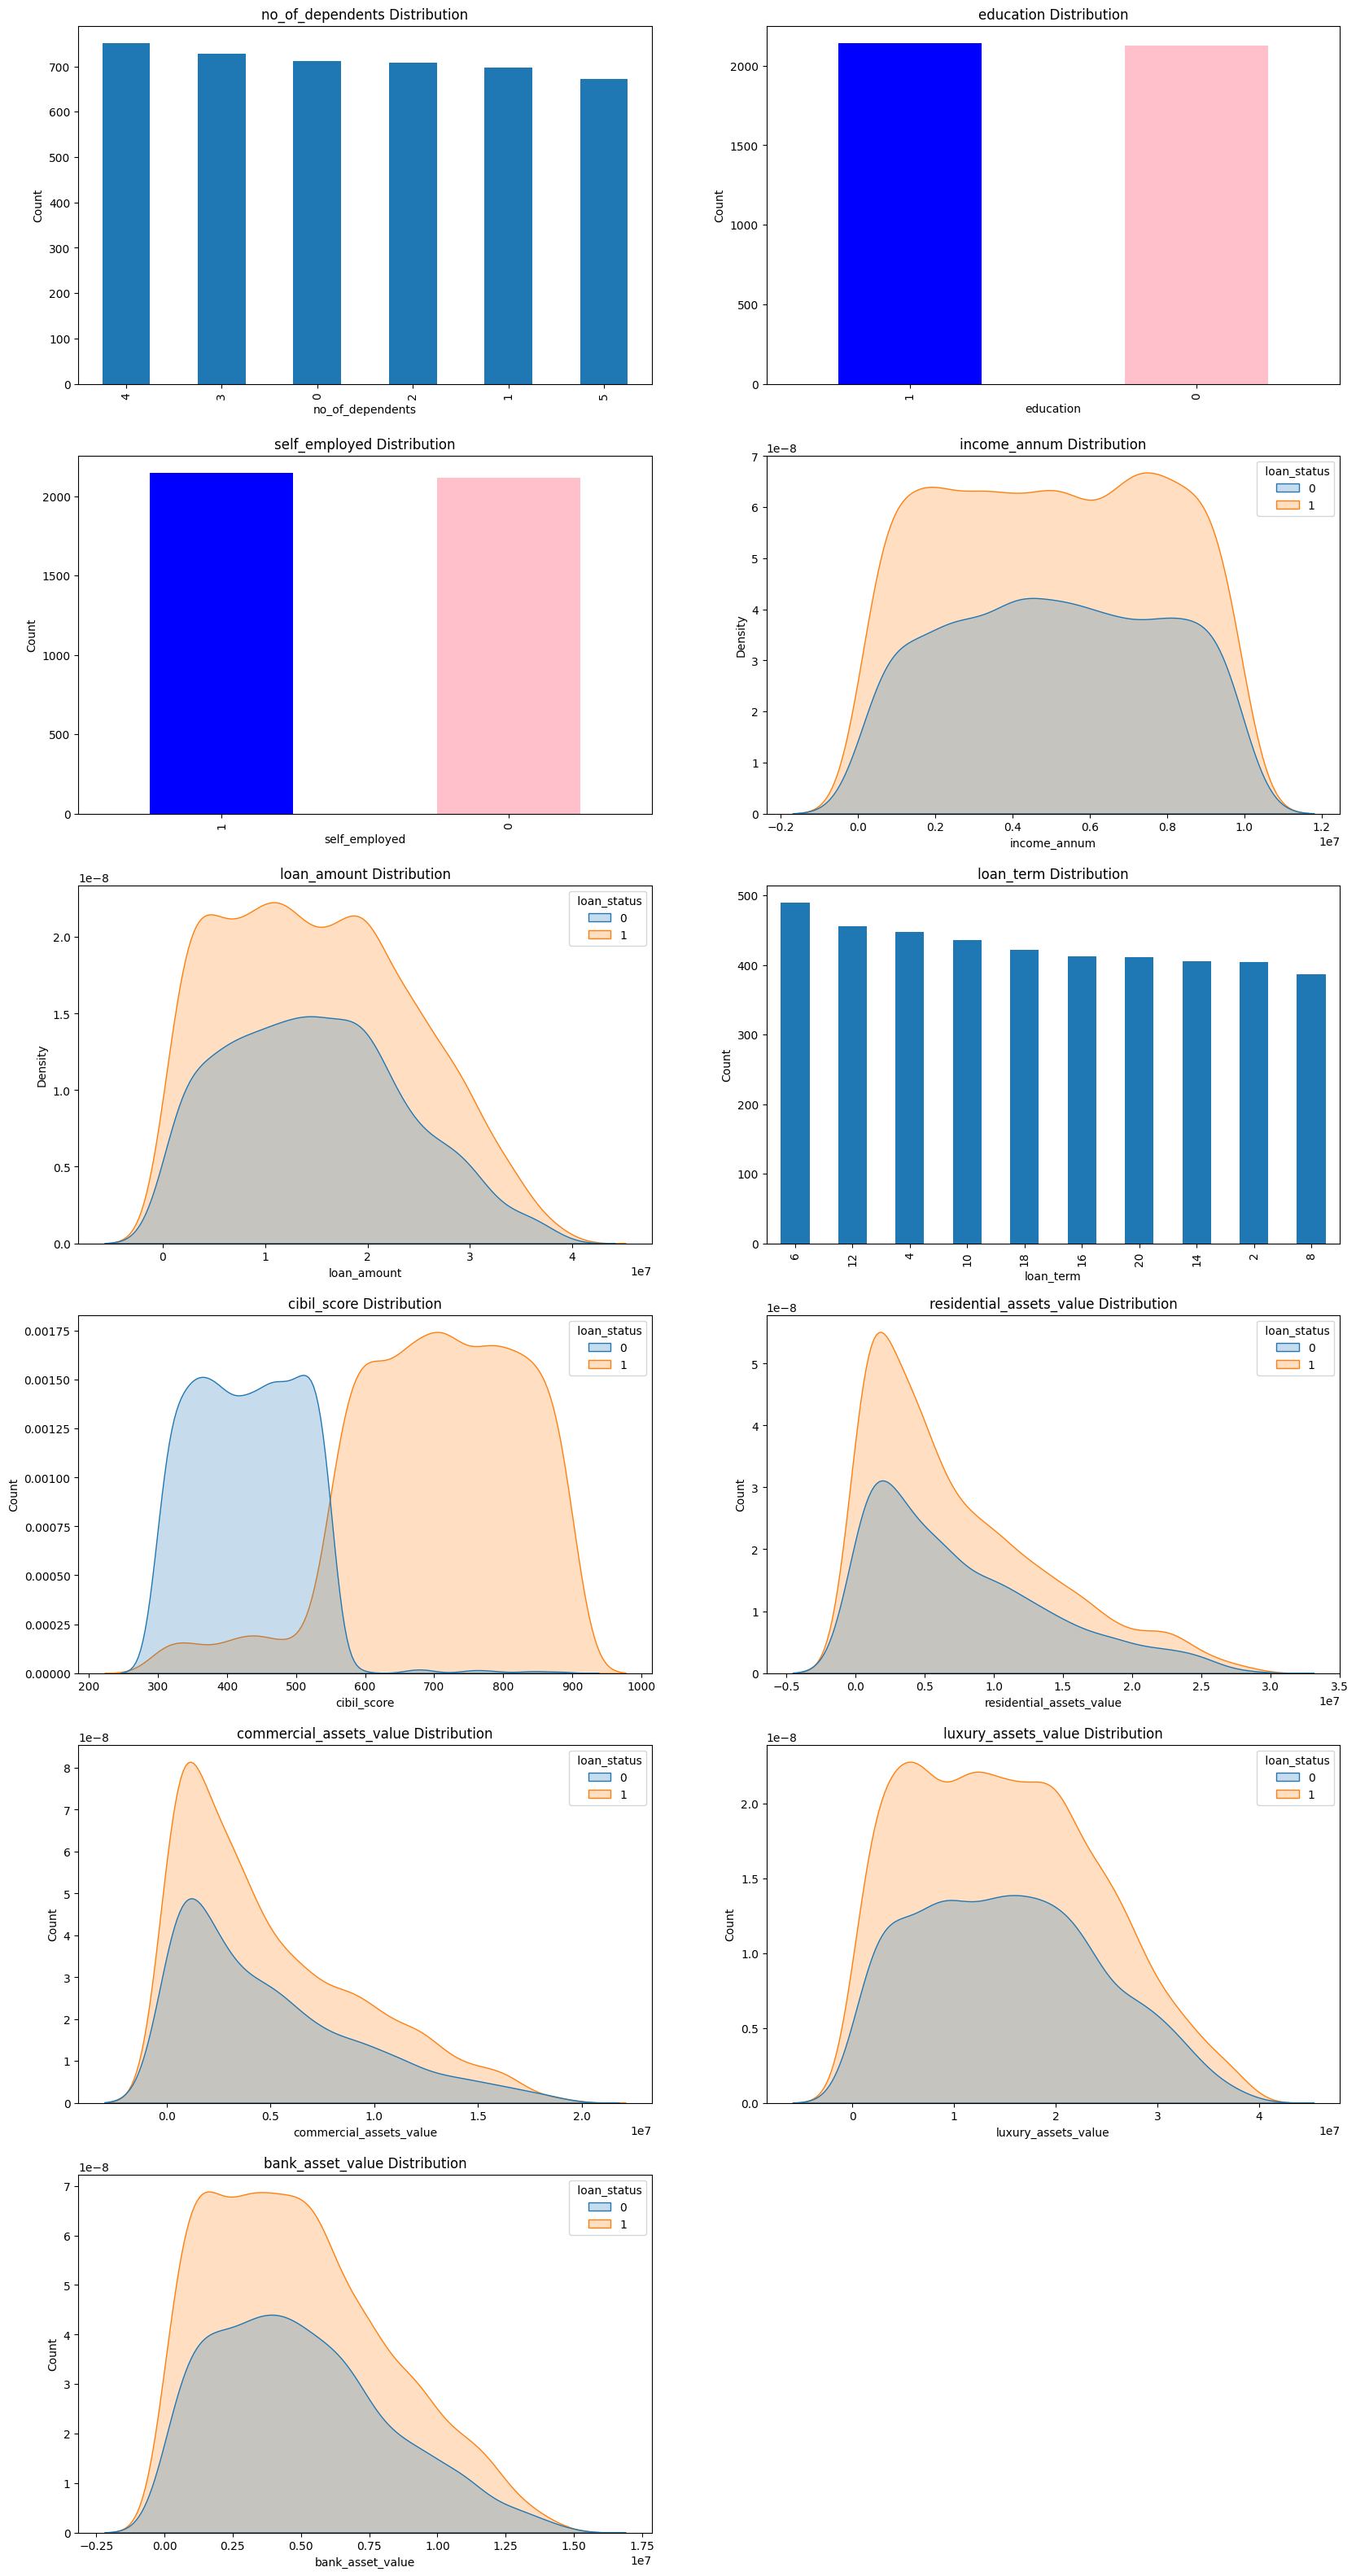

In [335]:
plt.figure(figsize=(20,40))
plt.subplot(6,2,1)
df[' no_of_dependents'].value_counts().plot(kind='bar')
plt.xlabel("no_of_dependents")
plt.ylabel("Count")
plt.title("no_of_dependents Distribution")
plt.subplot(6,2,2)
df[' education'].value_counts().plot(kind='bar',color=['blue','pink'])
plt.xlabel("education")
plt.ylabel("Count")
plt.title("education Distribution")
plt.subplot(6,2,3)
df[' self_employed'].value_counts().plot(kind='bar',color=['blue','pink'])
plt.xlabel("self_employed")
plt.ylabel("Count")
plt.title("self_employed Distribution")
plt.subplot(6,2,4)
sns.kdeplot(data=df,x=' income_annum',fill=True,hue=' loan_status')
plt.xlabel("income_annum")
plt.ylabel("Density")
plt.title("income_annum Distribution")
plt.subplot(6,2,5)
sns.kdeplot(data=df,x=' loan_amount',fill=True,hue=' loan_status')
plt.xlabel("loan_amount")
plt.ylabel("Density")
plt.title("loan_amount Distribution")
plt.subplot(6,2,6)
df[' loan_term'].value_counts().plot(kind='bar')
plt.xlabel("loan_term")
plt.ylabel("Count")
plt.title("loan_term Distribution")
plt.subplot(6,2,7)
sns.kdeplot(data=df,x=' cibil_score',fill=True,hue=' loan_status')
plt.xlabel("cibil_score")
plt.ylabel("Count")
plt.title("cibil_score Distribution")
plt.subplot(6,2,8)
sns.kdeplot(data=df,x=' residential_assets_value',fill=True,hue=' loan_status')
plt.xlabel("residential_assets_value")
plt.ylabel("Count")
plt.title("residential_assets_value Distribution")
plt.subplot(6,2,9)
sns.kdeplot(data=df,x=' commercial_assets_value',fill=True,hue=' loan_status')
plt.xlabel("commercial_assets_value")
plt.ylabel("Count")
plt.title("commercial_assets_value Distribution")
plt.subplot(6,2,10)
sns.kdeplot(data=df,x=' luxury_assets_value',fill=True,hue=' loan_status')
plt.xlabel("luxury_assets_value")
plt.ylabel("Count")
plt.title("luxury_assets_value Distribution")
plt.subplot(6,2,11)
sns.kdeplot(data=df,x=' bank_asset_value',fill=True,hue=' loan_status')
plt.xlabel("bank_asset_value")
plt.ylabel("Count")
plt.title("bank_asset_value Distribution")

# Checking for outliers

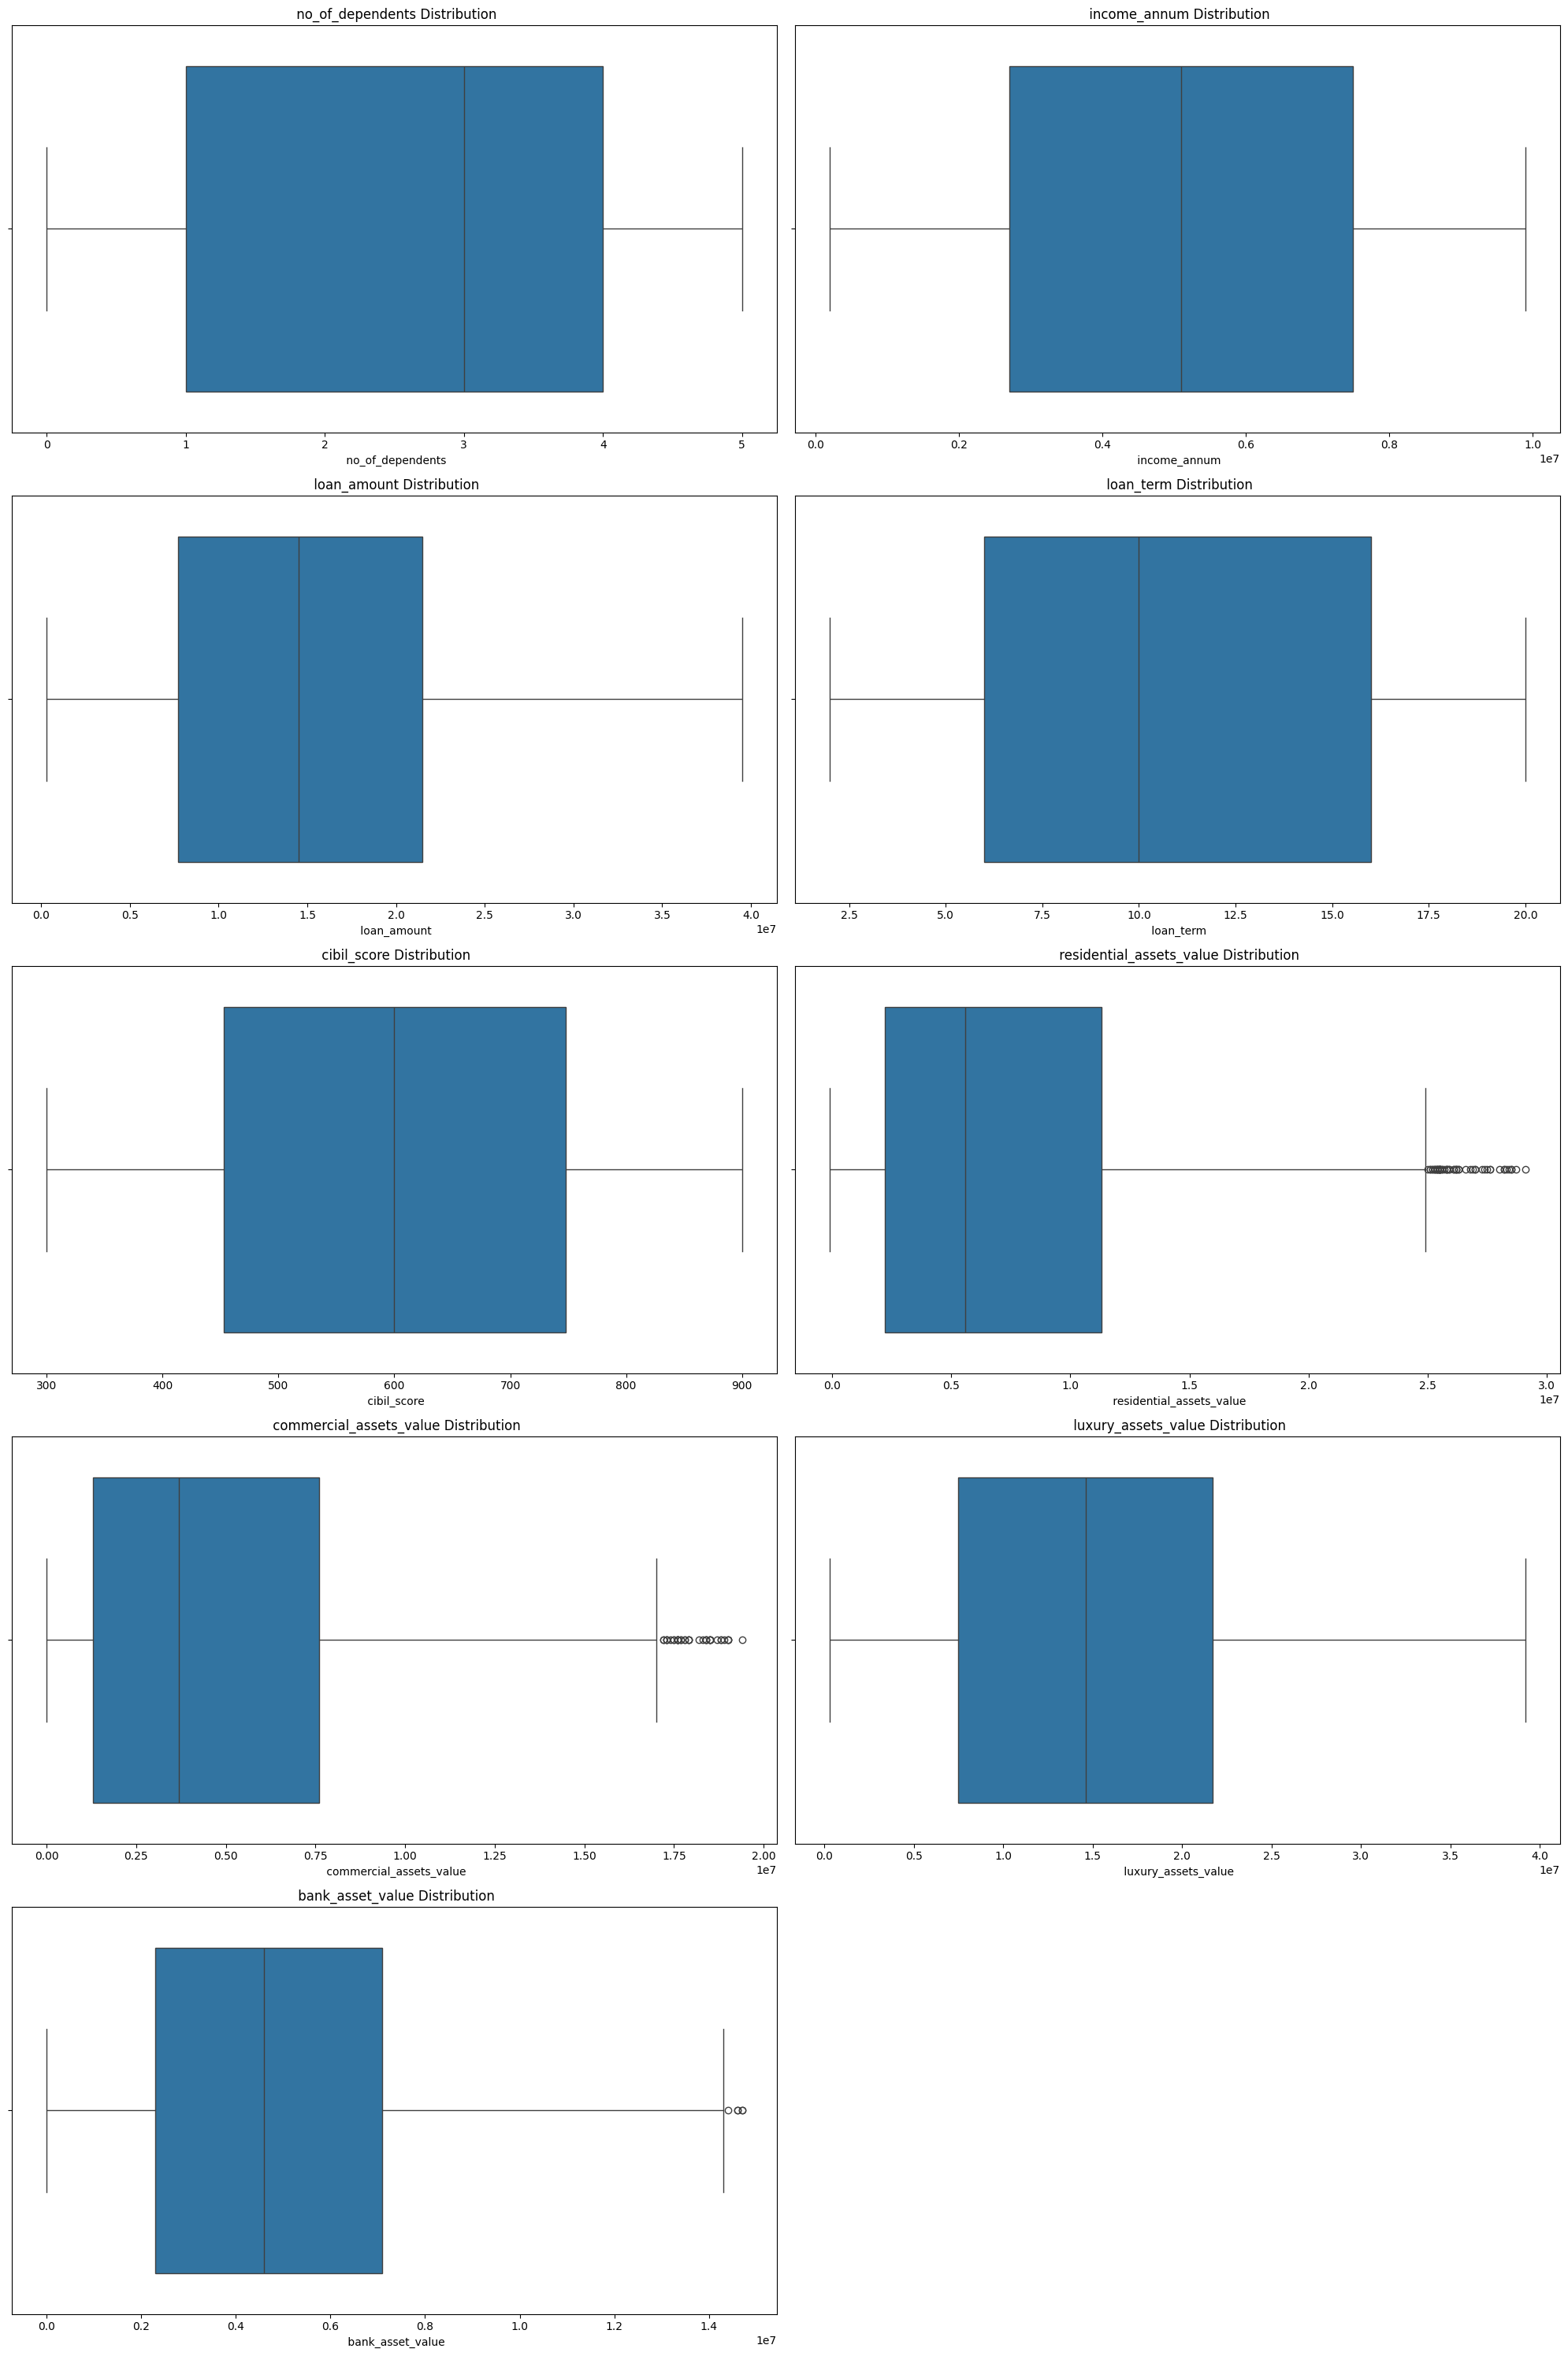

In [336]:
plt.figure(figsize=(20,30))
cols = [" no_of_dependents", " income_annum", " loan_amount", " loan_term", " cibil_score", " residential_assets_value", " commercial_assets_value", " luxury_assets_value", " bank_asset_value"]
i=1
for col in cols:
  plt.subplot(5,2,i)
  sns.boxplot(data=df,x=col)
  plt.title(f"{col} Distribution")
  i+=1
plt.tight_layout()


residential_assets_value, commercial_assets_value, bank_asset_value have outliers

# Splitting to X and Y

In [337]:
X=df.drop(" loan_status",axis='columns')
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [338]:
Y=df[' loan_status']
Y.head()

,loan_status
0,1
1,0
2,0
3,0
4,0


# Splitting to train and test splits

In [339]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print("Shape of X: ",np.shape(X))
print("Shape of X train: ",np.shape(X_train))
print("Shape of X test: ",np.shape(X_test))

Shape of X:  (4269, 11)
Shape of X train:  (3415, 11)
Shape of X test:  (854, 11)


# Feature scaling

In [340]:
#we will use robust scaler to handle the outliers
from sklearn.preprocessing import RobustScaler
for col in X_train.columns:
    mms=RobustScaler()
    X_train[col]=mms.fit_transform(X_train[[col]])
    X_test[col]=mms.transform(X_test[[col]])
X_train.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
725,0.333333,-1.0,-1.0,-0.020833,0.311594,0.0,0.516779,-0.219780,-0.492063,-0.105634,-0.395833
409,0.666667,-1.0,-1.0,-0.437500,-0.188406,-0.4,0.825503,0.285714,-0.238095,-0.521127,-0.458333
2023,0.000000,0.0,-1.0,0.166667,0.000000,0.0,-0.647651,-0.351648,0.222222,0.598592,-0.166667
4202,-0.333333,0.0,0.0,0.541667,0.384058,0.4,0.953020,1.571429,1.730159,0.528169,0.729167
463,-0.666667,0.0,0.0,-0.270833,-0.282609,0.2,0.365772,-0.417582,0.396825,-0.140845,-0.416667


In [341]:
X_test.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
2492,0.666667,-1.0,-1.0,-1.020833,-1.000000,0.6,-0.687919,-0.615385,-0.587302,-0.985915,-0.895833
1949,-0.666667,-1.0,-1.0,0.229167,0.485507,0.0,-0.449664,1.098901,1.079365,0.633803,0.166667
3749,-1.000000,-1.0,-1.0,0.583333,0.855072,0.8,0.818792,0.945055,1.746032,0.908451,0.375000
2586,-0.666667,-1.0,0.0,0.979167,1.565217,0.2,0.093960,2.461538,0.063492,1.077465,1.395833
666,-0.333333,0.0,0.0,-0.833333,-0.797101,0.0,-0.587248,-0.582418,-0.460317,-0.746479,-0.645833


# Models

since it is binary classification so we can use:

# Logistic Regression

In [342]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
model=LogisticRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(Y_test,y_pred)
recall=recall_score(Y_test,y_pred)
f1=f1_score(Y_test,y_pred)
precision=precision_score(Y_test,y_pred)
print("Logistic Regression: ")
print("Accurracy score: ",accuracy)
print("Recall score: ", recall)
print("F1 score: ",f1)
print("Precision score: ", precision)

Logistic Regression: 
Accurracy score:  0.9098360655737705
Recall score:  0.9328358208955224
F1 score:  0.9285051067780873
Precision score:  0.9242144177449169


Train and Test score both close to each other so no overfit, and test score is high so no underfit

# Directly using grid search cv

In [343]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
models_params={
    'Logistic Regression':{
        'model':LogisticRegression(),
        'params':{}
    },
    'Decision Tree':{
        'model': DecisionTreeClassifier(),
        'params':{}
    },
    'Gaussian NB':{
        'model': GaussianNB(),
        'params':{}
    },
    'Random Forest':{
        'model': RandomForestClassifier(),
        'params':{'n_estimators':list(np.arange(1,50))}
    },
    'KNN':{
        'model': KNeighborsClassifier(),
        'params':{'n_neighbors':list(np.arange(1,31))}
    },
    'SVM':{
        'model': SVC(),
        'params': {'kernel':['linear','rbf','poly'],'C':list(0.01*np.arange(1,20))}
    },
    'Linear SVC':{
        'model': LinearSVC(),
        'params': {'C':list(0.01*np.arange(1,20))}
    }

}
scores=[]
for model_name,mp in models_params.items():
  clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
  clf.fit(X_train,Y_train)
  best_model = clf.best_estimator_
  y_pred = best_model.predict(X_test)
  acc = accuracy_score(Y_test, y_pred)
  prec = precision_score(Y_test, y_pred)
  rec = recall_score(Y_test, y_pred)
  f1 = f1_score(Y_test, y_pred)
  scores.append({
        'model': model_name,
        'best params': clf.best_params_,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1-score': f1
    })
  results=pd.DataFrame(scores,columns=['model','best params','accuracy','precision','recall','f1-score'])

In [344]:
results

,model,best params,accuracy,precision,recall,f1-score
0,Logistic Regression,{},0.909836,0.924214,0.932836,0.928505
1,Decision Tree,{},0.981265,0.988722,0.981343,0.985019
2,Gaussian NB,{},0.932084,0.957854,0.932836,0.945180
3,Random Forest,{'n_estimators': 34},0.982436,0.985102,0.986940,0.986021
4,KNN,{'n_neighbors': 28},0.906323,0.940154,0.908582,0.924099
5,SVM,"{'C': 0.17, 'kernel': 'rbf'}",0.934426,0.949438,0.945896,0.947664
6,Linear SVC,{'C': 0.01},0.909836,0.928972,0.927239,0.928105


In [345]:
best_idx = results['accuracy'].idxmax()
best_model = results.loc[best_idx]

print("Best model based on test accuracy:")
print(f"Model: {best_model['model']}")
print(f"Accuracy score: {best_model['accuracy']}")
print(f"Recall score: {best_model['recall']}")
print(f"F1 score: {best_model['f1-score']}")
print(f"Precision score: {best_model['precision']}")
print(f"Best Parameters: {best_model['best params']}")


Best model based on test accuracy:
Model: Random Forest
Accuracy score: 0.9824355971896955
Recall score: 0.9869402985074627
F1 score: 0.9860205032618826
Precision score: 0.9851024208566108
Best Parameters: {'n_estimators': np.int64(34)}
